# Lab: Pandas practice with a new dataset
This Lab gives you practice doing groupbys, filtering, and plotting with a new dataset in Pandas.

**NOTE \#1: It is *highly* recommended that you hit "Save & Grade" after you answer each prompt in order to catch any errors in order.**

**NOTE \#2: Make sure you don't accidentally overwrite any of the variables.**

## Setup

<p>Read in the dataframe with <code>df = pd.read_csv('labfiles/dataframe.csv')</code>. <b>Make sure this variable is called <code>df</code>.</b></p><p>Make sure you set any values labeled <code>None</code> or 'None' to NaN.</p>

In [15]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
import pandas as pd
df = pd.read_csv('labfiles/dataframe.csv')
len(df)

2000

## Format the data

<h3>Data Cleaning &amp; Data Formatting</h3><h4>1. Cleaning missing data</h4><p>Depending on what questions you choose (like with the buildings dataset that we used in class) there may be some missing data. You should set the <code>na_values</code> input parameter for values of 'None' in any of the columns you want to use for your assignment.  </p><p>For example, we set 0 values of 'Square Footage', 'Year Acquired' &amp; 'Year Constructed' to NA's in the buildings dataset in class.  In this case, instead of searching for 0's in your columns, you might want to look for 'None' or None in your columns.</p><h4>2. Formatting Date columns and getting year/month/day columns.</h4><p>You will need to get the month, year, and day out of these date columns ('Original Issue Date', 'Effective Date', 'Expiration Date', 'LastModifiedDate', 'Discipline Start Date', 'Discipline End Date').  You can do this in two steps.<ol><li>First, you can convert each date column, for example:<pre>   licenses = df.copy()</pre><pre>   licenses['Original Issue Date'] = pd.to_datetime(licenses['Original Issue Date'],errors='coerce',format='%m/%d/%Y')</pre>will convert the Original Issue Date column.</li><li>Then you can create a new year-column for the 'Original Issue Date' with:<pre>   licenses['Original Issue Year'] = licenses['Original Issue Date'].dt.year</pre></p></li><b>Make sure you name any Year columns with 'Date' replaced by 'Year', any Month columns with 'Date' replaced by 'Month', and any Day columns with 'Date' replaced with 'Day'.</b>  For example, to add the 'Month' and 'Day' columns to the dataframe (in addition to the 'Year' column calculated above) for 'Original Issue Date' we would use:<pre>   licenses['Original Issue Month'] = licenses['Original Issue Date'].dt.month</pre><pre>   licenses['Original Issue Day'] = licenses['Original Issue Date'].dt.day</pre>This will allow the grader to give you appropriate feedback.</li></ol>

In [2]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
licenses = df.copy()
licenses['Original Issue Date'] = pd.to_datetime(licenses['Original Issue Date'],errors='coerce',format='%m/%d/%Y')
licenses['Original Issue Year'] = licenses['Original Issue Date'].dt.year
licenses['Original Issue Month'] = licenses['Original Issue Date'].dt.month
licenses['Original Issue Day'] = licenses['Original Issue Date'].dt.day

licenses['Effective Date'] = pd.to_datetime(licenses['Effective Date'],errors='coerce',format='%m/%d/%Y')
licenses['Effective Year'] = licenses['Effective Date'].dt.year
licenses['Effective Month'] = licenses['Effective Date'].dt.month
licenses['Effective Day'] = licenses['Effective Date'].dt.day

licenses['Expiration Date'] = pd.to_datetime(licenses['Expiration Date'],errors='coerce',format='%m/%d/%Y')
licenses['Expiration Year'] = licenses['Expiration Date'].dt.year
licenses['Expiration Month'] = licenses['Expiration Date'].dt.month
licenses['Expiration Day'] = licenses['Expiration Date'].dt.day

licenses['LastModifiedDate'] = pd.to_datetime(licenses['LastModifiedDate'],errors='coerce',format='%m/%d/%Y')
licenses['LastModifiedYear'] = licenses['LastModifiedDate'].dt.year
licenses['LastModifiedMonth'] = licenses['LastModifiedDate'].dt.month
licenses['LastModifiedDay'] = licenses['LastModifiedDate'].dt.day

licenses['Discipline Start Date'] = pd.to_datetime(licenses['Discipline Start Date'],errors='coerce',format='%m/%d/%Y')
licenses['Discipline Start Year'] = licenses['Discipline Start Date'].dt.year
licenses['Discipline Start Month'] = licenses['Discipline Start Date'].dt.month
licenses['Discipline Start Day'] = licenses['Discipline Start Date'].dt.day

licenses['Discipline End Date'] = pd.to_datetime(licenses['Discipline End Date'],errors='coerce',format='%m/%d/%Y')
licenses['Discipline End Year'] = licenses['Discipline End Date'].dt.year
licenses['Discipline End Month'] = licenses['Discipline End Date'].dt.month
licenses['Discipline End Day'] = licenses['Discipline End Date'].dt.day
licenses.columns

Index(['_id', 'License Type', 'Description', 'License Number',
       'License Status', 'Business', 'Title', 'First Name', 'Middle',
       'Last Name', 'Prefix', 'Suffix', 'Business Name', 'BusinessDBA',
       'Original Issue Date', 'Effective Date', 'Expiration Date', 'City',
       'State', 'Zip', 'County', 'Specialty/Qualifier',
       'Controlled Substance Schedule',
       'Delegated Controlled Substance Schedule', 'Ever Disciplined',
       'LastModifiedDate', 'Case Number', 'Action', 'Discipline Start Date',
       'Discipline End Date', 'Discipline Reason', 'Original Issue Year',
       'Original Issue Month', 'Original Issue Day', 'Effective Year',
       'Effective Month', 'Effective Day', 'Expiration Year',
       'Expiration Month', 'Expiration Day', 'LastModifiedYear',
       'LastModifiedMonth', 'LastModifiedDay', 'Discipline Start Year',
       'Discipline Start Month', 'Discipline Start Day', 'Discipline End Year',
       'Discipline End Month', 'Discipline End Day'],

## Plot #1

### Calculation

<p>Calculate the median 'Effective Year' for each 'Original Issue Year' and <b>save this variable as 'gb1'</b>.</p><p>Note: for this calculation you will need to format the date columns as datetime and extract the year (see Tips &amp; Tricks section for more details).</p><p>Checks will be run assuming the listed column names ('Effective Year' and 'Original Issue Year') so make sure any columns you create are named accordingly.</p>

In [3]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
gb1 = licenses.groupby('Original Issue Year')['Effective Year'].median()
gb1

Original Issue Year
1912    1912.0
1926    1926.0
1928    1928.0
1931    1931.0
1932    1932.0
         ...  
2018    2018.0
2019    2019.0
2020    2020.0
2021    2021.0
2022    2022.0
Name: Effective Year, Length: 81, dtype: float64

### Figure:

<p>Make a plot showing this relationship using <code>fig_gb1,ax_gb1 = plt.subplots()</code>. <b>Make sure you check your figure/axes names.</b></p>

Text(0.5, 0, 'Issue Year')

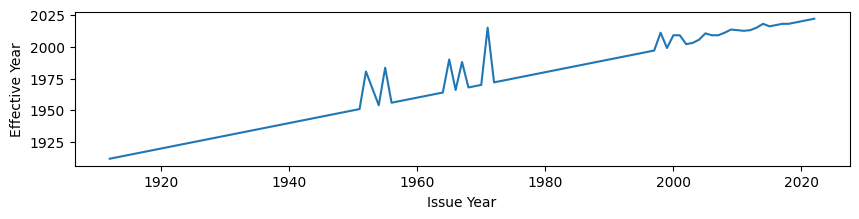

In [4]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
import matplotlib.pyplot as plt
fig_gb1,ax_gb1 = plt.subplots(figsize = (10,2))
ax_gb1.plot(gb1)
ax_gb1.set_ylabel('Effective Year')
ax_gb1.set_xlabel('Issue Year')

## Plot #2

### Calculation
<p>Calculate the maximum 'Effective Year' for each 'Controlled Substance Schedule' and <b>save this variable as 'gb2'</b>.</p><p>Note: for this calculation you will need to format the date columns as datetime and extract the year (see Tips &amp; Tricks section for more details).</p><p>Checks will be run assuming the listed column names ('Effective Year' and 'Controlled Substance Schedule') so make sure any columns you create are named accordingly.</p>

In [5]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
gb2 = licenses.groupby('Controlled Substance Schedule')['Effective Year'].max()
gb2

Controlled Substance Schedule
II III          2006.0
II III IV       2021.0
II III IV V     2022.0
II IV              NaN
Name: Effective Year, dtype: float64

### Figure:

<p>Make a plot showing this relationship using <code>fig_gb2,ax_gb2 = plt.subplots()</code>. <b>Make sure you check your figure/axes names.</b></p><p>Tip: What type of plot do you think is the most appropriate for this type of data?</p>

(2005.0, 2023.0)

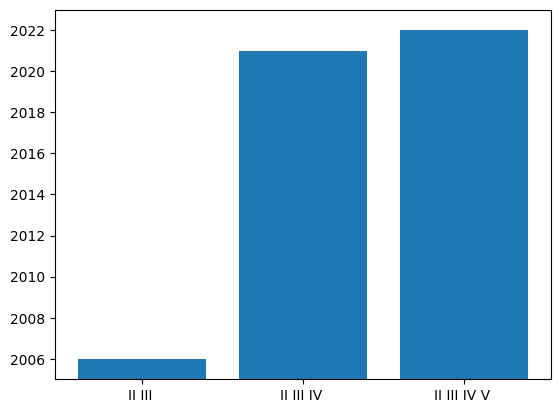

In [6]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
fig_gb2,ax_gb2 = plt.subplots()
ax_gb2.bar(gb2.index, gb2.values)
ax_gb2.set_ylim(gb2.min() - 1, gb2.max() + 1) # Set your limit to scale the plot

## Plot #3

### Calculation:

<p>Create a dataframe which is a subset of the original dataframe, but contains rows with only the ten most common entries in 'County'.</p><p><b>Name this dataframe 'gb3'.</b></p>

In [7]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
top_counties = licenses['County'].value_counts().head(10).index
gb3 = licenses[licenses['County'].isin(top_counties)]
gb3

,_id,License Type,Description,License Number,License Status,Business,Title,First Name,Middle,Last Name,...,Expiration Day,LastModifiedYear,LastModifiedMonth,LastModifiedDay,Discipline Start Year,Discipline Start Month,Discipline Start Day,Discipline End Year,Discipline End Month,Discipline End Day
0,912152,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129025682,NOT RENEWED,N,NaN,NaN,NaN,NaN,...,31.0,2006,8,3,NaN,NaN,NaN,NaN,NaN,NaN
1,527445,COSMO,LICENSED COSMETOLOGIST,11260608,NOT RENEWED,N,NaN,WAYNE,NaN,YUSTEN,...,31.0,2022,5,9,NaN,NaN,NaN,NaN,NaN,NaN
2,1010711,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129291526,NOT RENEWED,N,NaN,TAMRA,H,GALLO,...,31.0,2009,7,12,NaN,NaN,NaN,NaN,NaN,NaN
3,514112,COSMO,LICENSED COSMETOLOGIST,11216844,NOT RENEWED,N,NaN,MARY HARZINE,NaN,SAUNDERS,...,30.0,2006,5,26,NaN,NaN,NaN,NaN,NaN,NaN
4,1076276,DETECTIVE BOARD,PERMANENT EMPLOYEE REGISTRATION,129318955,NOT RENEWED,N,NaN,PHILIP,A,BEATTY,...,31.0,2012,7,10,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,518601,COSMO,LICENSED COSMETOLOGIST,11222972,NOT RENEWED,N,NaN,NaN,NaN,NaN,...,30.0,2017,11,1,NaN,NaN,NaN,NaN,NaN,NaN
1995,769166,DETECTIVE BOARD,FIREARM CONTROL CARD,229030775,TERMINATED CARD RETURNED,N,NaN,PRIYA,NaN,PATEL,...,1.0,2007,1,19,NaN,NaN,NaN,NaN,NaN,NaN
1996,331182,COSMO,LICENSED BARBER,6059805.0,NOT RENEWED,N,NaN,JOSE,NaN,RAMIREZ,...,31.0,2006,5,25,NaN,NaN,NaN,NaN,NaN,NaN
1997,767610,DETECTIVE BOARD,FIREARM CONTROL CARD,229022992,NOT RENEWED,N,NaN,ELENE WILKINS,NaN,LEWIS,...,29.0,2007,1,19,NaN,NaN,NaN,NaN,NaN,NaN


### Figure

<p>Using this dataframe, calculate and plot the mean 'Original Issue Year' for the ten most common entries in 'County' as a function of 'Effective Year'.</p><p>This should be a plot with ten different lines, one for each of the ten most common entries in 'County'.</p><p>Make the plot showing this relationship using <code>fig_gb3,ax_gb3 = plt.subplots()</code>.</p><p><b>Make sure you check your figure/axes names.</b></p><p>Hint: There shouldn't be any NaN's in any of the data you use to plot.</p><p></p><p>Note that the figure you get will look a little odd and definitely have some aesthetic issues!  While we'll worry more about aesthetics for the Homeworks and Final Project, at this stage of just practicing with Pandas, we'll ignore these issues for now.</p>

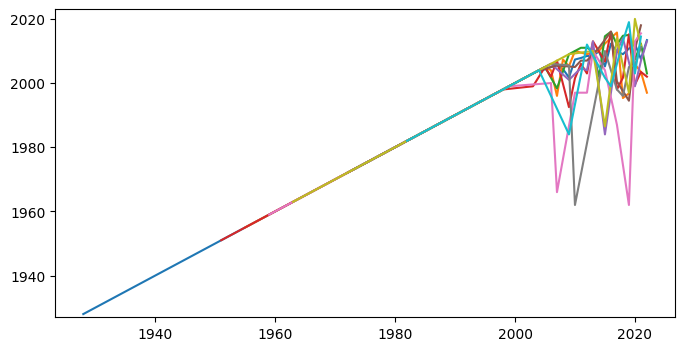

In [8]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
top_10_counties = licenses['County'].value_counts().head(10).index # Find top 10 counties
top_10_data = licenses[licenses['County'].isin(top_10_counties)] # Take out irrelevant data

fig_gb3,ax_gb3 = plt.subplots(figsize = (8,4))
ax_gb3.set_ylim(top_10_data['Original Issue Year'].min() - 1, top_10_data['Original Issue Year'].max() + 1) 

for county in top_10_counties:
    df_1 = top_10_data[top_10_data['County'] == county]
    mean_og_year = df_1.groupby('Effective Year')['Original Issue Year'].mean()
    ax_gb3.plot(mean_og_year.index, mean_og_year.values, label=county)

In [9]:
top_10_counties = licenses['County'].value_counts().head(10).index
top_10_counties

Index(['COOK', 'DUPAGE', 'WILL', 'LAKE', 'KANE', 'SAINT CLAIR', 'SANGAMON',
       'MCHENRY', 'WINNEBAGO', 'MADISON'],
      dtype='object', name='County')

In [10]:
top_10_data = licenses[licenses['County'].isin(top_10_counties)]
top_10_data = top_10_data.groupby(['County','Effective Year'])
mean_og_year = top_10_data['Original Issue Year'].mean()
mean_og_year

County     Effective Year
COOK       1928.0            1928.0
           1932.0            1932.0
           1933.0            1933.0
           1935.0            1935.0
           1943.0            1943.0
                              ...  
WINNEBAGO  2015.0            1986.5
           2017.0            2014.0
           2019.0            1997.0
           2020.0            2020.0
           2021.0            2011.8
Name: Original Issue Year, Length: 276, dtype: float64

(1927.0, 2021.0)

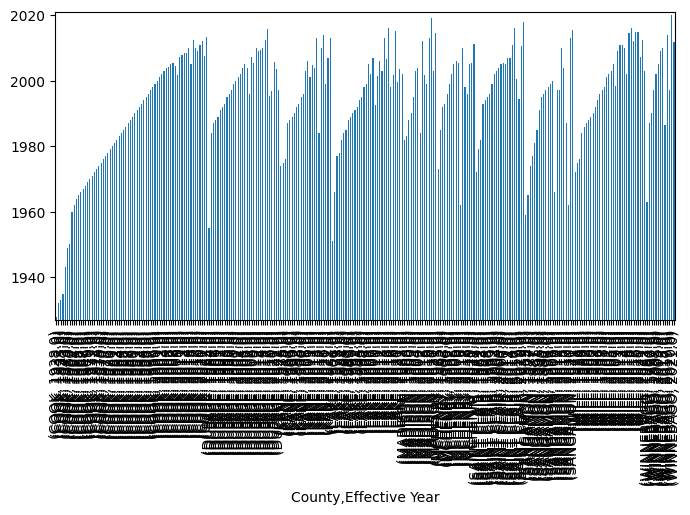

In [11]:
fig_gb3,ax_gb3 = plt.subplots(figsize = (8,4))
mean_og_year.plot(kind = 'bar', ax = ax_gb3)
ax_gb3.set_ylim(mean_og_year.min() - 1, mean_og_year.max() + 1) # Set y limit to scale the plot

In [16]:
len(df)

2000